This post is meant to provide a quick, concise but comprehensive overview of how to deal with time series datasets  and its typical pre-processing steps. It also gives a brief introduction to stationary and non-stationary data.

**Time Series:** <br>
Time series is a sequence of information which attaches a time period to each value. The value can be pretty much anything measurable that depends on time in some way. Like stock prices, humidity or number of people. As long as the values record are unambiguous any medium could be measured with time series. There aren't any limitations regarding the total time span of the time series. It could be a minute a day a month or even a century. All that is needed is a starting and an ending point usually.
<br>
Time Series Data donot follow any of the standard distributions because they never satisfies Gauss-Markov assumptions unlike regular linear regression data.<br>

**DATASET**<br>
Here I will be using a weather time series dataset recorded by the Max Planck Institute for Biogeochemistry.
<br>
This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes,between 2009 and 2016.<br>

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# Storing it into a data frame
df = pd.read_csv(csv_path)


**Creating a copy of the data**

In [3]:
data = df.copy()

**Data Preprocessing**

**Visualizing and processing the Column names**

In [4]:
data.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

Here it can be seen the column names have gaps/blank spaces in between, this can cause error while selecting particular columns by mentioning the coloumn names. So eliminating those gaps can solve the problem.

In [5]:
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['DateTime', 'p(mbar)', 'T(degC)', 'Tpot(K)', 'Tdew(degC)', 'rh(%)',
       'VPmax(mbar)', 'VPact(mbar)', 'VPdef(mbar)', 'sh(g/kg)',
       'H2OC(mmol/mol)', 'rho(g/m**3)', 'wv(m/s)', 'max.wv(m/s)', 'wd(deg)'],
      dtype='object')

**Checking for duplicate instances.**

In [6]:
len(data) -len(data['DateTime'].unique())

327

So there are 327 duplicate values. These can be removed by the drop_duplicate method.

In [7]:
data.drop_duplicates(subset ="DateTime", 
                     keep = 'first',  # Considering the first value as unique and rest of the same values as duplicate.
                     inplace = True) 

Rechecking for duplicate instances shows null. Thus duplicates have been succesfully removed.

In [8]:
len(data) -len(data['DateTime'].unique())

0

**Indexing with date-time stamps**<br>
Visualizing the data with three time stamps. Here the columns represent instances and the attributes are shown in rows. <br>
The first row contains the time stamps. <br>
The dataset contains **14 attributes.**<br>
Moreover, the date-time stamp is present as an attribute. Using it as the index of the dataframe is more convenient.

In [9]:
data.head(3).T

,0,1,2
DateTime,01.01.2009 00:10:00,01.01.2009 00:20:00,01.01.2009 00:30:00
p(mbar),996.52,996.57,996.53
T(degC),-8.02,-8.41,-8.51
Tpot(K),265.4,265.01,264.91
Tdew(degC),-8.9,-9.28,-9.31
rh(%),93.3,93.4,93.9
VPmax(mbar),3.33,3.23,3.21
VPact(mbar),3.11,3.02,3.01
VPdef(mbar),0.22,0.21,0.2
sh(g/kg),1.94,1.89,1.88


Before using the date-time as index its better to change it to python's date time object. 

In [10]:
data['DateTime'].describe()

count                  420224
unique                 420224
top       13.12.2012 05:00:00
freq                        1
Name: DateTime, dtype: object

In [11]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['DateTime'].describe()

count                  420224
unique                 420224
top       2012-10-26 12:50:00
freq                        1
first     2009-01-01 00:10:00
last      2017-01-01 00:00:00
Name: DateTime, dtype: object

Setting date-time as the dataframe index.

In [12]:
data.set_index('DateTime', inplace=True)


In [13]:
data.head(5).T

DateTime,2009-01-01 00:10:00,2009-01-01 00:20:00,2009-01-01 00:30:00,2009-01-01 00:40:00,2009-01-01 00:50:00
p(mbar),996.52,996.57,996.53,996.51,996.51
T(degC),-8.02,-8.41,-8.51,-8.31,-8.27
Tpot(K),265.40,265.01,264.91,265.12,265.15
Tdew(degC),-8.90,-9.28,-9.31,-9.07,-9.04
rh(%),93.30,93.40,93.90,94.20,94.10
VPmax(mbar),3.33,3.23,3.21,3.26,3.27
VPact(mbar),3.11,3.02,3.01,3.07,3.08
VPdef(mbar),0.22,0.21,0.20,0.19,0.19
sh(g/kg),1.94,1.89,1.88,1.92,1.92
H2OC(mmol/mol),3.12,3.03,3.02,3.08,3.09


Lets check the statistical data (such as count, mean etc) of each attribute.<br>
It can seen the **pressure**, **temperature**, **density**, **wind degree(WD)** have relatively high mean comparing to other attributes.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
p(mbar),420224.0,989.214157,8.360888,913.60,984.20,989.58,994.73,1015.35
T(degC),420224.0,9.442421,8.421135,-23.01,3.36,9.40,15.46,37.28
Tpot(K),420224.0,283.484880,8.502206,250.60,277.43,283.46,289.52,311.34
Tdew(degC),420224.0,4.953472,6.731171,-25.01,0.23,5.21,10.07,23.11
rh(%),420224.0,76.028738,16.460467,12.95,65.24,79.30,89.40,100.00
VPmax(mbar),420224.0,13.568642,7.734770,0.95,7.77,11.81,17.59,63.77
VPact(mbar),420224.0,9.532333,4.183996,0.79,6.21,8.86,12.35,28.32
VPdef(mbar),420224.0,4.036225,4.891287,0.00,0.87,2.18,5.29,46.01
sh(g/kg),420224.0,6.021503,2.656043,0.50,3.92,5.59,7.80,18.13
H2OC(mmol/mol),420224.0,9.638778,4.235244,0.80,6.28,8.96,12.48,28.82


**Checking for null value and fixing data frequency**<br>
While dealing with time series data, the frequency of each time stamp is important. Fixing the frequency to a constant value can be done by the python's asfreq() method. <br>
Our data has been recorded at an interval of 10 minutes, everyday from 01/01/2009 to 01-01-2017.<br>
Before setting the frequency, lets check if there's any null value.<br>

In [15]:
data.isna().sum()

p(mbar)           0
T(degC)           0
Tpot(K)           0
Tdew(degC)        0
rh(%)             0
VPmax(mbar)       0
VPact(mbar)       0
VPdef(mbar)       0
sh(g/kg)          0
H2OC(mmol/mol)    0
rho(g/m**3)       0
wv(m/s)           0
max.wv(m/s)       0
wd(deg)           0
dtype: int64

So there is no null value. Lets set the time interval to 10 mins. If it inserts any extra instance, that can be filled with the following values (same approach can be attained to fill null values):
1. mean
2. median
3. the immediate before or after value
4. Any user defined value 

Here I will be using the immediate previous value. <br>
But before that, its better to ensure that the indices are all in ascending order. This can be done by sorting the dataframe in ascending order, specifically here as the index values are date-time values.

In [16]:
data = data.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='mergesort',
                na_position='last', sort_remaining=True)

In [17]:
data = data.asfreq(freq='10min',method='ffill')
(data.head().T)

DateTime,2009-01-01 00:10:00,2009-01-01 00:20:00,2009-01-01 00:30:00,2009-01-01 00:40:00,2009-01-01 00:50:00
p(mbar),996.52,996.57,996.53,996.51,996.51
T(degC),-8.02,-8.41,-8.51,-8.31,-8.27
Tpot(K),265.40,265.01,264.91,265.12,265.15
Tdew(degC),-8.90,-9.28,-9.31,-9.07,-9.04
rh(%),93.30,93.40,93.90,94.20,94.10
VPmax(mbar),3.33,3.23,3.21,3.26,3.27
VPact(mbar),3.11,3.02,3.01,3.07,3.08
VPdef(mbar),0.22,0.21,0.20,0.19,0.19
sh(g/kg),1.94,1.89,1.88,1.92,1.92
H2OC(mmol/mol),3.12,3.03,3.02,3.08,3.09


**PLOTTING THE DATA** <br>
Lets, plot the pressure attribute

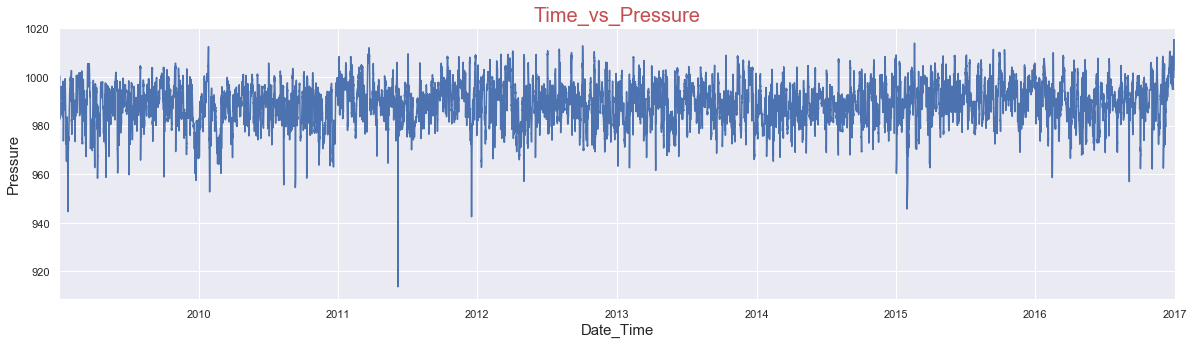

In [18]:
data['p(mbar)'].plot(figsize=(20,5))
plt.title('Time_vs_Pressure', fontsize=20, color='r')
plt.ylabel('Pressure',fontsize=15)
plt.xlabel('Date_Time',fontsize=15)
plt.show()

**Q-Q Plot** <br>
A Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.
To determine whether the data is distributed in a certain way. It usually shows how the data fits the normal distribution.
It plots all the values a variable contains and arranges in order, where the y-axis represent the ordered values from min to max. The x-axis shows the theoretical quantiles of the data i.e. how many standard deviations away from the mean these values are. <br>
Below is a Q-Q plot of the pressure variable.
The **Red line** shows how the data should have followed if they were normally distributed. Thus it shows the data is not normally distributed.

In [19]:
import scipy.stats as ssplt
import pylab

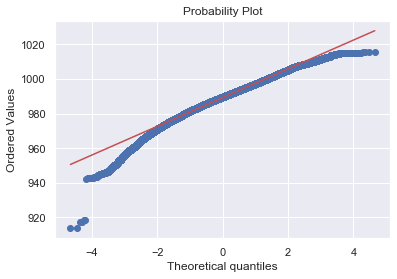

In [20]:
ssplt.probplot(data['p(mbar)'], plot=pylab)
pylab.show()

# **Different kinds of time-series data**
1. Stationary 
2. Non-stationary

A stationary series is a stochastic process whose statistical properties such as mean, variance (the average degree to which each point differs from the average of all data points) and autocorrelation do not change over time. Hence, a non-stationary series is one whose statistical properties change over time because of presence of a certain trend.<br>
Types of stationary time-series:<br>
<t> a) **Strict Stationary:** In a series when samples of identical size have identical distributions, i.e. $Sample_1$ ($x_t$, $x_{t+k}$) and $Sample_2$ ($x_{t+e}$, $x_{t+e+k}$) have same distributions **(Dist($\mu$,$\sigma^2$))**. This is very restrictive and rarelyobserved in nature.<br>
<t> b) **Weak Stationary:** having a **constant mean** ($\mu$ = constant), **constant variance** ($\rho$=constant) and **consistent covariance** between periods at an identical distance from one another i.e. Cov($x_n$, $x_{n+k}$) = Cov($x_m$, $x_{m+k}$). Eg: **white noise**. <br>

Non-stationary data should be converted to stationary before applying any forecasting model, ny removing its underlying trend which is also a function of time.

**WHITE NOISE** <br>
A white noise is a sequence with no specific pattern. In case of time series, when the mean and the variance doesn't change over time, and there is no clear relationship between present and past values.<br>
Conditions for which a time series is a white noise: <br>
1. mean ($\mu$) = 0 (constant)
2. varaince ($\sigma$) = constant
3. Auto-correlation ($\rho$) = **cor $(x_t, x_{t-1})$ = 0** <br>(thus constant co-variance, since Cov($x_t$,$x_{t_1}$) = $\rho$($x_t$,$x_{t-1}$)*($\sigma_{x_t}$, $\sigma_{x_{t-1}}$) = 0  <br>

Thus white noise is a sequence of random data without having any periodicity, happens sporadically, and there's no scope of projecting it into the future. <br> NOTE: When the values of the sequence are drawn from from a Gaussian Distribution, then it is called Gaussian White Noise.
<br>
Lets, check if our pressure data is a white noise or not. In order to do so, we can create a white noise (random values from a normal distribution) having mean and variance of the pressure attribute.




In [21]:
white_noise = np.random.normal(loc = data['p(mbar)'].mean(), #mean of the pressure attribute 
                               scale = data['p(mbar)'].std(), #standard deviation of pressure attribute
                               size = len(data))

Lets, compare the original pressure data with its white noise. For that its better to create a separate dataframe with these two time series.

In [22]:
press_noise = pd.DataFrame(data['p(mbar)'])
press_noise['White_Noise'] = white_noise
press_noise.head()

,p(mbar),White_Noise
DateTime,,
2009-01-01 00:10:00,996.52,990.787520
2009-01-01 00:20:00,996.57,991.901143
2009-01-01 00:30:00,996.53,994.329886
2009-01-01 00:40:00,996.51,992.027583
2009-01-01 00:50:00,996.51,987.105276


In [23]:
press_noise.describe()

,p(mbar),White_Noise
count,420768.000000,420768.000000
mean,989.218778,989.214672
std,8.357717,8.365454
min,913.600000,950.854988
25%,984.210000,983.574355
50%,989.590000,989.212760
75%,994.720000,994.858965
max,1015.350000,1027.655144


We can see the newly generated white noise has similar mean and standard deviation with that of the pressure series. Plotting the graph of these series will further clarify the comparison.

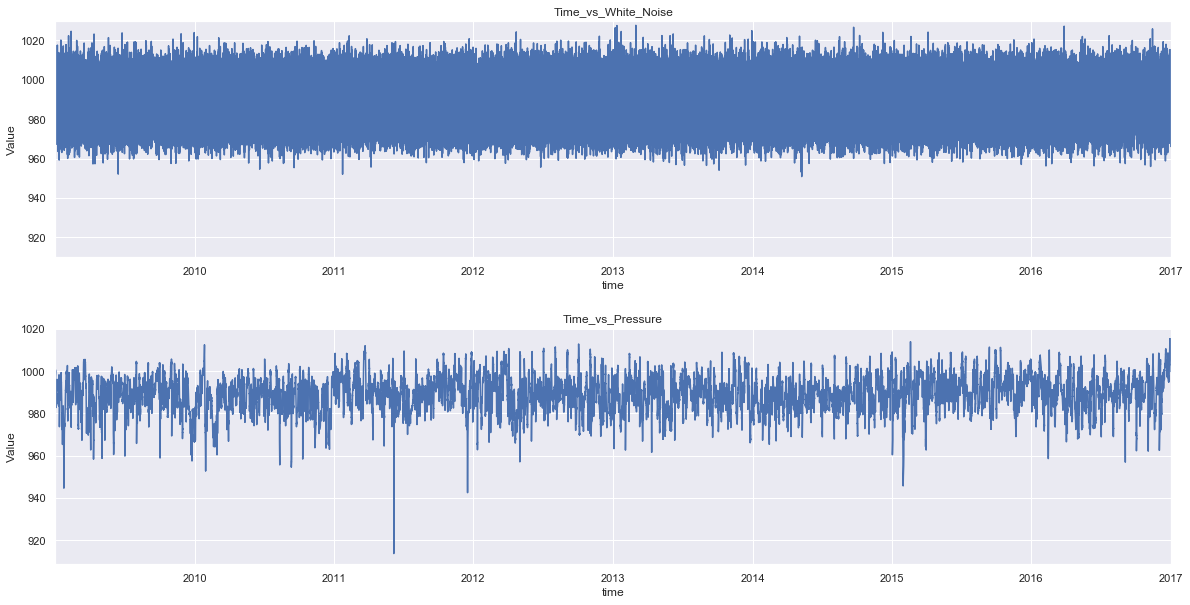

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.subplots_adjust(hspace = 0.3)

press_noise['White_Noise'].plot()
plt.title('Time_vs_White_Noise')
plt.xlabel('time')
plt.ylabel('Value')
plt.ylim(910, 1030)

plt.subplot(2,1,2)
press_noise['p(mbar)'].plot()
plt.title('Time_vs_Pressure')
plt.xlabel('time')
plt.ylabel('Value')

plt.show()
plt.savefig('noise_vs_data.png')

As the series contains 420224 data points, the graph is clumpsy, plotting with fewer data points will solve the issue.

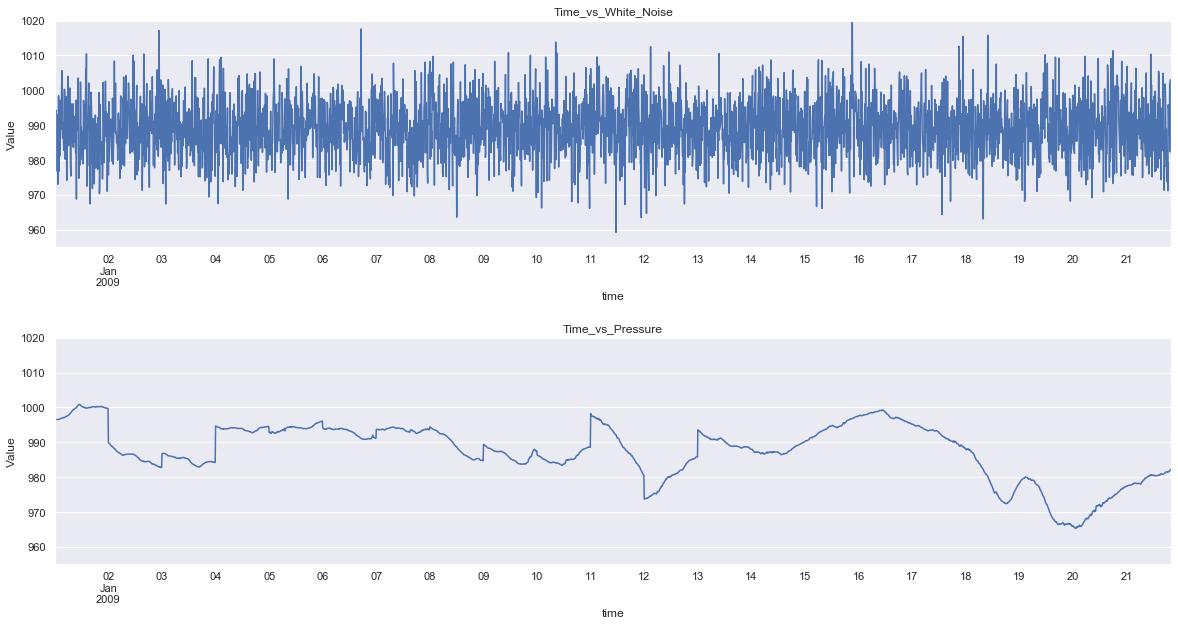

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.subplots_adjust(hspace = 0.4)

press_noise['White_Noise'][:3000].plot()
plt.title('Time_vs_White_Noise')
plt.xlabel('time')
plt.ylabel('Value')
plt.ylim(955,1020)

plt.subplot(2,1,2)
press_noise['p(mbar)'][:3000].plot()
plt.title('Time_vs_Pressure')
plt.xlabel('time')
plt.ylabel('Value')
plt.ylim(955,1020)
plt.show()
plt.savefig('noise_vs_data_trunc.png')

Now, it is easy to see the differences between the pattern of the two series. So there are smaller jumps between periods in the pressure value, since the values are not random. Thus to make an accurate forecast, the pattern has to be recognised.
